# |Temperature Forecast Project using ML-DS2306-Date-04-11-23-Sudhanshu Kumar Singh|

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [3]:
# Load the dataset
data = pd.read_csv("D:/sks/Flip_Robo_techonology _project/Project_discussion/Third_Phase_Project/projects - oct 2p023/temperature.csv")

In [4]:
data.shape

(7752, 25)

In [5]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


In [8]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [9]:
# Define the columns to impute missing value
impute_columns=['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax',
                'LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax','Next_Tmin']

In [10]:
# Filling missing values with the mean
data[impute_columns] = data[impute_columns].fillna(data[impute_columns].mean())

In [11]:
# Forward fill missing dates
data['Date'] = pd.to_datetime(data['Date']) ## Convert the 'Date' column to a datetime format
data['Date'].fillna(method='ffill', inplace=True)

C:\Users\Sudhanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-06-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sudhanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sudhanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sudhanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-07-2013' in DD/MM/YYYY format. Provide 

In [12]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7752.0,13.000000,7.210637,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7752.0,29.768211,2.956557,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7752.0,23.225059,2.403036,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7752.0,56.759372,14.596973,19.794666,46.046162,55.313244,67.038254,98.524734
LDAPS_RHmax,7752.0,88.374804,7.157124,58.936283,84.316923,89.699505,93.704500,100.000153
LDAPS_Tmax_lapse,7752.0,29.613447,2.932898,17.624954,27.693091,29.662273,31.683819,38.542255
LDAPS_Tmin_lapse,7752.0,23.512589,2.333973,14.272646,22.114651,23.735942,25.134000,29.619342
LDAPS_WS,7752.0,7.097875,2.173245,2.882580,5.686487,6.563068,8.007471,21.857621
LDAPS_LH,7752.0,62.505019,33.567001,-13.603212,37.532764,57.310630,83.904586,213.414006
LDAPS_CC1,7752.0,0.368774,0.261185,0.000000,0.148321,0.320110,0.571696,0.967277


# Data visualization


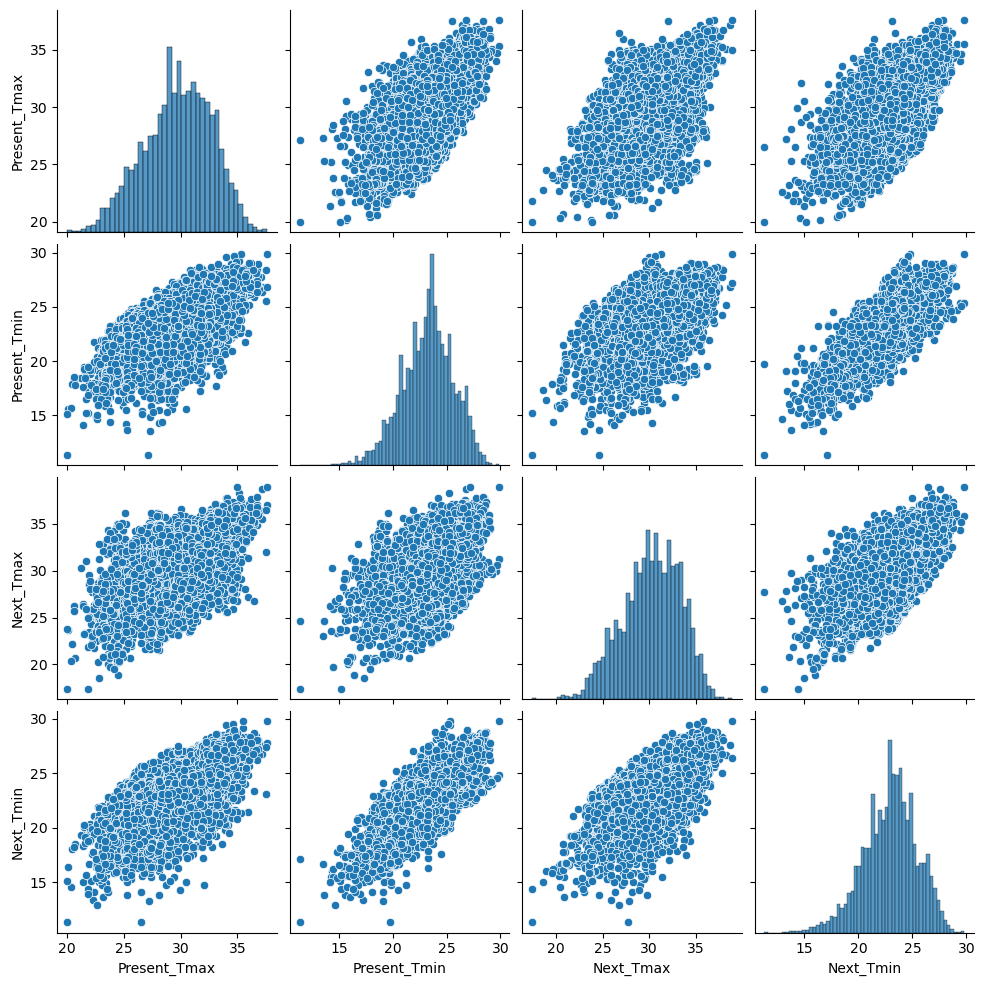

In [14]:
sns.pairplot(data[['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']])
plt.show()

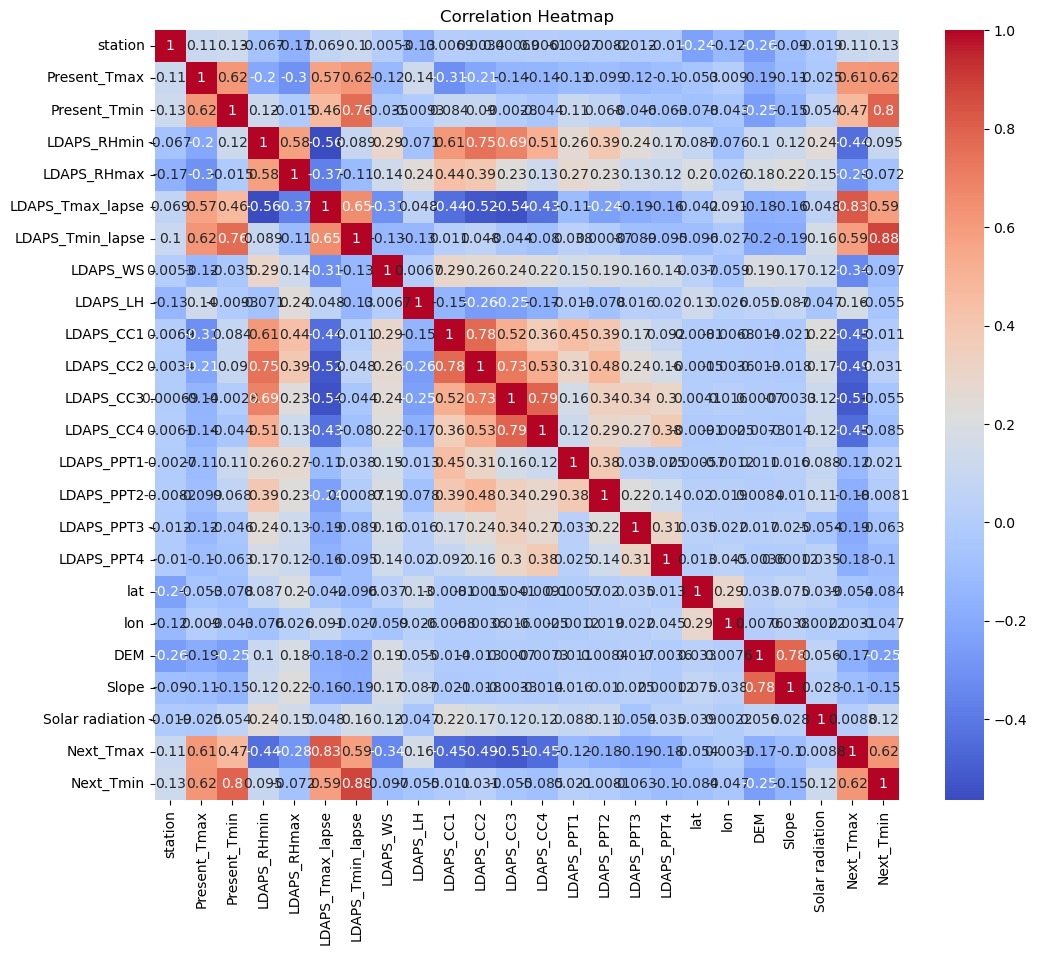

In [15]:
# Heatmap to visualize correlations between numerical attributes
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

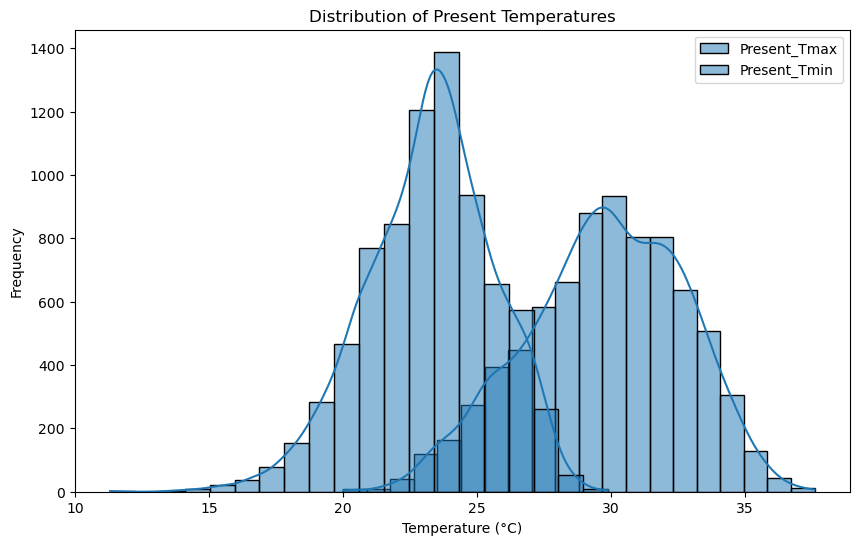

In [16]:
# Distribution of Present_Tmax and Present_Tmin
plt.figure(figsize=(10, 6))
sns.histplot(data['Present_Tmax'], bins=20, kde=True, label='Present_Tmax')
sns.histplot(data['Present_Tmin'], bins=20, kde=True, label='Present_Tmin')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Present Temperatures')
plt.legend()
plt.show()

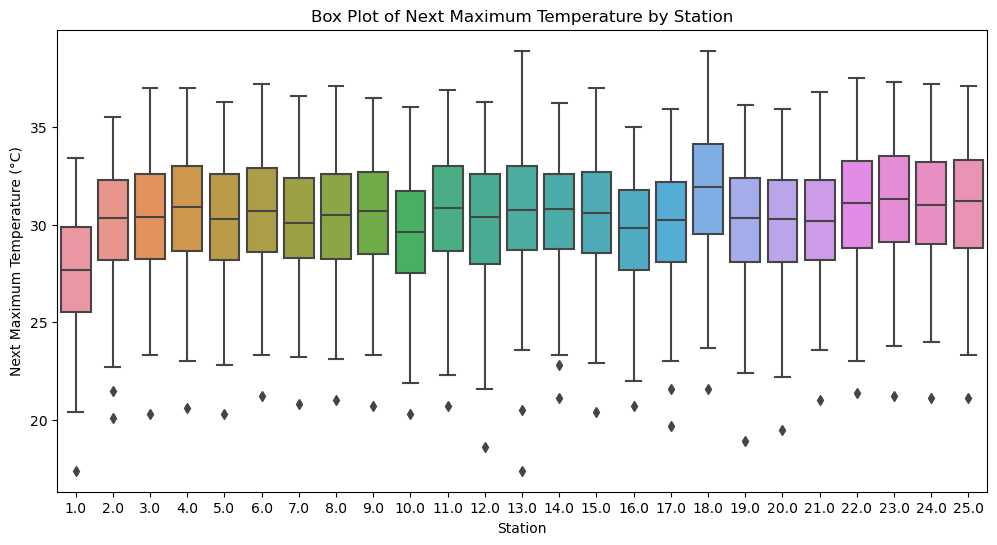

In [17]:
# Boxplot to visualize the distribution of Next_Tmax and Next_Tmin by station
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='Next_Tmax', data=data)
plt.xlabel('Station')
plt.ylabel('Next Maximum Temperature (°C)')
plt.title('Box Plot of Next Maximum Temperature by Station')
plt.show()

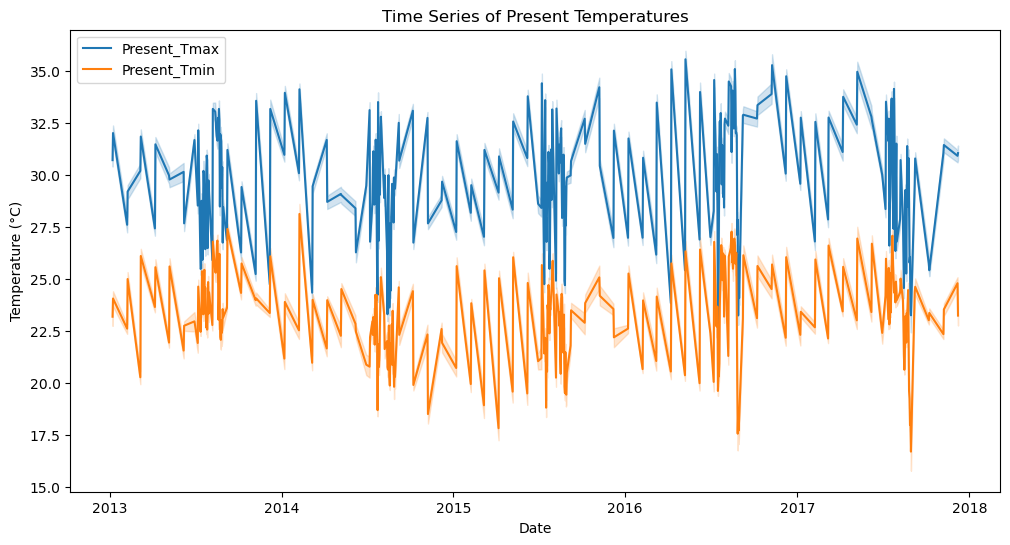

In [18]:
# Time series plot for Present_Tmax and Present_Tmin
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Present_Tmax', data=data, label='Present_Tmax')
sns.lineplot(x='Date', y='Present_Tmin', data=data, label='Present_Tmin')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Present Temperatures')
plt.legend()
plt.show()

In [19]:
# Split the data into features and target variables
X = data.drop(['Next_Tmax', 'Next_Tmin','Date'], axis=1)
y_max = data['Next_Tmax']
y_min = data['Next_Tmin']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test, y_min_train, y_min_test = train_test_split(
    X, y_max, y_min, test_size=0.2, random_state=42)

In [22]:
# Max Temperature Model
max_temp_model = RandomForestRegressor(n_estimators=100, random_state=42)
max_temp_model.fit(X_train, y_max_train)

RandomForestRegressor(random_state=42)

In [23]:
# Min Temperature Model
min_temp_model = RandomForestRegressor(n_estimators=100, random_state=42)
min_temp_model.fit(X_train, y_min_train)

RandomForestRegressor(random_state=42)

In [24]:
# Max Temperature Model Evaluation
y_max_pred = max_temp_model.predict(X_test)
max_temp_mse = mean_squared_error(y_max_test, y_max_pred)
max_temp_r2 = r2_score(y_max_test, y_max_pred)


In [25]:
print("Max Temperature Model Evaluation:")
print(f"Mean Squared Error: {max_temp_mse:.2f}")
print(f"R-squared Score: {max_temp_r2:.2f}")

Max Temperature Model Evaluation:
Mean Squared Error: 0.91
R-squared Score: 0.91


In [123]:
# Min Temperature Model Evaluation
y_min_pred = min_temp_model.predict(X_test)
min_temp_mse = mean_squared_error(y_min_test, y_min_pred)
min_temp_r2 = r2_score(y_min_test, y_min_pred)

In [124]:
print("\nMin Temperature Model Evaluation:")
print(f"Mean Squared Error: {min_temp_mse:.2f}")
print(f"R-squared Score: {min_temp_r2:.2f}")


Min Temperature Model Evaluation:
Mean Squared Error: 0.58
R-squared Score: 0.91
